In [1]:
import some_load_train_evaluate_functions as ml

from sklearn.svm import SVC

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Diabetes data

diabetes_df = ml.get_data_of_disease(driver, 'Diabetes')
diabetes_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Diabetes
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,1
8889,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8890,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8891,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


In [4]:
svm_classifier = SVC()

### Preprocessing

### Mean Imputation

In [5]:
# Splitting and Preprocessing data

X, y, X_train, X_test, y_train, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)


Train Accuracy: 0.957

Test Accuracy: 0.929

Precision: 0.887

Recall: 0.472

F1-Score: 0.616

Confusion Matrix:

[[1550   13]
 [ 114  102]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.99      0.96      1563
     Class 1       0.89      0.47      0.62       216

    accuracy                           0.93      1779
   macro avg       0.91      0.73      0.79      1779
weighted avg       0.93      0.93      0.92      1779


ROC-AUC Curve:


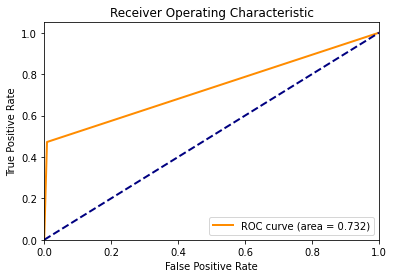

In [6]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_test,y_test)

### Zero Imputation

In [7]:
# Imputing null values with zeroes

X, y, X_train, X_test, y_train, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)


Train Accuracy: 0.931

Test Accuracy: 0.921

Precision: 0.912

Recall: 0.384

F1-Score: 0.541

Confusion Matrix:

[[1555    8]
 [ 133   83]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.96      1563
     Class 1       0.91      0.38      0.54       216

    accuracy                           0.92      1779
   macro avg       0.92      0.69      0.75      1779
weighted avg       0.92      0.92      0.91      1779


ROC-AUC Curve:


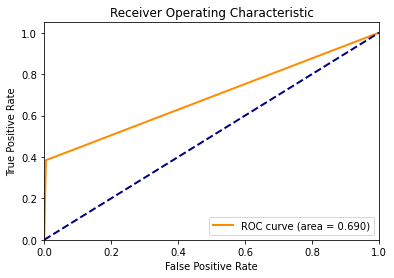

In [8]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_test,y_test)

### Mode Imputation

In [9]:
# Imputing with most frequent values

X, y, X_train, X_test, y_train, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)


Train Accuracy: 0.956

Test Accuracy: 0.930

Precision: 0.897

Recall: 0.481

F1-Score: 0.627

Confusion Matrix:

[[1551   12]
 [ 112  104]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.99      0.96      1563
     Class 1       0.90      0.48      0.63       216

    accuracy                           0.93      1779
   macro avg       0.91      0.74      0.79      1779
weighted avg       0.93      0.93      0.92      1779


ROC-AUC Curve:


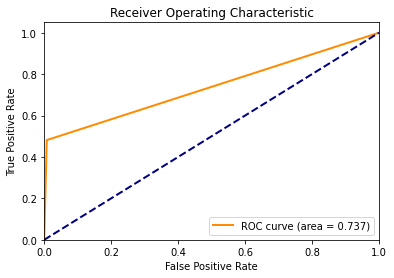

In [10]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_test,y_test)

### k-NN Imputation

In [11]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_test, y_train, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)


Train Accuracy: 0.952

Test Accuracy: 0.925

Precision: 0.881

Recall: 0.444

F1-Score: 0.591

Confusion Matrix:

[[1550   13]
 [ 120   96]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.99      0.96      1563
     Class 1       0.88      0.44      0.59       216

    accuracy                           0.93      1779
   macro avg       0.90      0.72      0.77      1779
weighted avg       0.92      0.93      0.91      1779


ROC-AUC Curve:


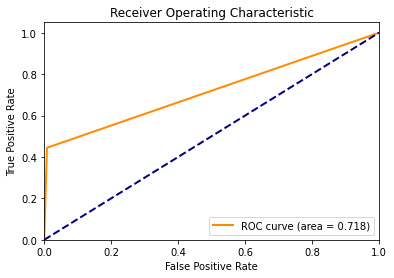

In [12]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_test,y_test)

### Multiple Imputation by Chained Equations (MICE)

In [13]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_test, y_train, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)


Train Accuracy: 0.953

Test Accuracy: 0.926

Precision: 0.870

Recall: 0.463

F1-Score: 0.604

Confusion Matrix:

[[1548   15]
 [ 116  100]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.99      0.96      1563
     Class 1       0.87      0.46      0.60       216

    accuracy                           0.93      1779
   macro avg       0.90      0.73      0.78      1779
weighted avg       0.92      0.93      0.92      1779


ROC-AUC Curve:


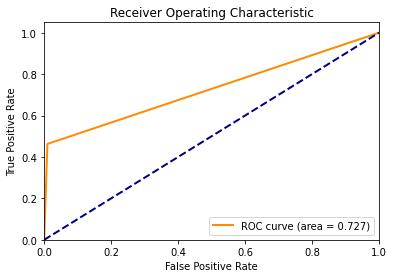

In [14]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_test,y_test)

### Median Imputation

In [15]:
# Imputing with median values

X, y, X_train, X_test, y_train, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)


Train Accuracy: 0.957

Test Accuracy: 0.930

Precision: 0.897

Recall: 0.481

F1-Score: 0.627

Confusion Matrix:

[[1551   12]
 [ 112  104]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.93      0.99      0.96      1563
     Class 1       0.90      0.48      0.63       216

    accuracy                           0.93      1779
   macro avg       0.91      0.74      0.79      1779
weighted avg       0.93      0.93      0.92      1779


ROC-AUC Curve:


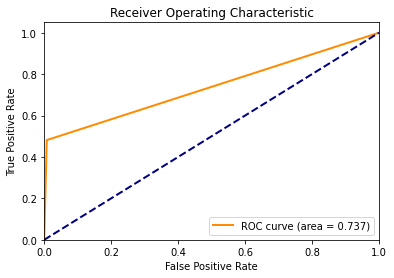

In [16]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_test,y_test)

### Dropping Null Values

In [83]:
# Drop null values
diabetes_df_na = diabetes_df.dropna()

X, y, X_train, X_test, y_train, y_test = ml.preprocess_and_split(df = diabetes_df_na, label = 'Diabetes',
                                                              impute = False, scale=True,
                                                              random_state=42)


Train Accuracy: 0.948

Test Accuracy: 0.806

Precision: 0.923

Recall: 0.500

F1-Score: 0.649

Confusion Matrix:

[[126   3]
 [ 36  36]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.78      0.98      0.87       129
     Class 1       0.92      0.50      0.65        72

    accuracy                           0.81       201
   macro avg       0.85      0.74      0.76       201
weighted avg       0.83      0.81      0.79       201


ROC-AUC Curve:


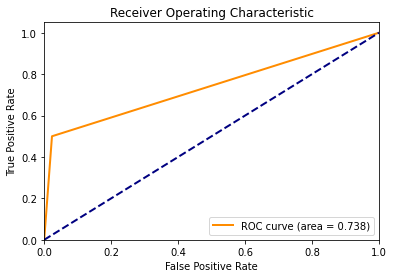

In [84]:
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_test,y_test)

### Hyperparameter Optimization 

### Grid Search

In [19]:
param_grid = {
    
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.1, 1],
    'class_weight': [None, 'balanced'],
    'probability': [True, False],
    'shrinking': [True, False],
    
}

In [20]:
grid_best_params, svm_classifier_grid = ml.grid_search_optimize(svm_classifier, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [21]:
grid_best_params

{'C': 1,
 'class_weight': None,
 'gamma': 'scale',
 'kernel': 'linear',
 'probability': True,
 'shrinking': True}


Train Accuracy: 0.926

Test Accuracy: 0.851

Precision: 0.850

Recall: 0.708

F1-Score: 0.773

Confusion Matrix:

[[120   9]
 [ 21  51]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.85      0.93      0.89       129
     Class 1       0.85      0.71      0.77        72

    accuracy                           0.85       201
   macro avg       0.85      0.82      0.83       201
weighted avg       0.85      0.85      0.85       201


ROC-AUC Curve:


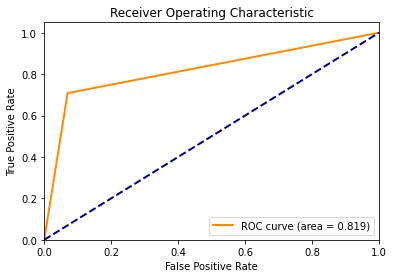

In [22]:
ml.evaluate_model_metrics(svm_classifier_grid,X_train,y_train,X_test,y_test)

### Random Search

In [32]:
rand_best_params, svm_classifier_rand = ml.random_search_optimize(svm_classifier,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [33]:
rand_best_params

{'shrinking': False,
 'probability': True,
 'kernel': 'linear',
 'gamma': 'scale',
 'class_weight': None,
 'C': 0.1}


Train Accuracy: 0.919

Test Accuracy: 0.846

Precision: 0.860

Recall: 0.681

F1-Score: 0.760

Confusion Matrix:

[[121   8]
 [ 23  49]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.84      0.94      0.89       129
     Class 1       0.86      0.68      0.76        72

    accuracy                           0.85       201
   macro avg       0.85      0.81      0.82       201
weighted avg       0.85      0.85      0.84       201


ROC-AUC Curve:


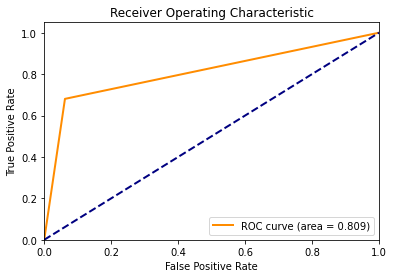

In [34]:
ml.evaluate_model_metrics(svm_classifier_rand,X_train,y_train,X_test,y_test)

### Optuna

In [68]:
def objective(trial):

    C = trial.suggest_loguniform('C', 1e-5, 1e2)  
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    shrinking = trial.suggest_categorical('shrinking', [True, False])
    probability = trial.suggest_categorical('probability', [True, False])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    random_state = 42

    model = SVC(C=C, kernel=kernel, shrinking=shrinking,probability=probability, 
                class_weight=class_weight, random_state=random_state)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [69]:
best_trial , svm_classifier_opt = ml.optuna_optimize(objective, SVC)

In [70]:
best_trial

{'C': 0.7116384511366518,
 'kernel': 'linear',
 'shrinking': True,
 'probability': False,
 'class_weight': None}


Train Accuracy: 0.921

Test Accuracy: 0.861

Precision: 0.867

Recall: 0.722

F1-Score: 0.788

Confusion Matrix:

[[121   8]
 [ 20  52]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.86      0.94      0.90       129
     Class 1       0.87      0.72      0.79        72

    accuracy                           0.86       201
   macro avg       0.86      0.83      0.84       201
weighted avg       0.86      0.86      0.86       201


ROC-AUC Curve:


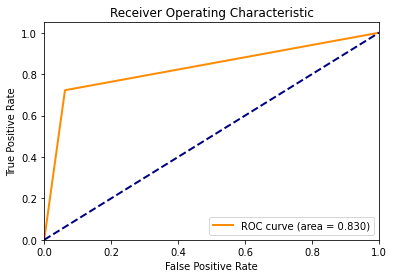

In [71]:
svm_classifier_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(svm_classifier_opt,X_train,y_train,X_test,y_test)

### Cross Validation

### K-fold and Stratified K-fold

In [72]:
ml.k_cross_validate(svm_classifier,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.87128713 0.88       0.83       0.82       0.86       0.83
 0.85       0.87       0.82       0.85      ]

Mean accuracy score:  0.8481287128712871

Standard deviation:  0.021019335607143943


In [73]:
ml.stratified_k_cross_validate(svm_classifier,X,y,n_splits=10)


Average Accuracy: 0.8501287128712871

Average Precision: 0.9486538492243163

Average Recall: 0.5827094474153297

Average F1-Score: 0.7195728386453272


In [74]:
# Tuned model

ml.k_cross_validate(svm_classifier_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.88118812 0.93       0.91       0.87       0.9        0.87
 0.87       0.9        0.87       0.83      ]

Mean accuracy score:  0.883118811881188

Standard deviation:  0.02646533912650423


In [75]:
ml.stratified_k_cross_validate(svm_classifier_opt,X,y,n_splits=10)


Average Accuracy: 0.871079207920792

Average Precision: 0.8670301851724267

Average Recall: 0.7325311942959003

Average F1-Score: 0.7910372952765298
